<a href="https://colab.research.google.com/github/7692TITO/EDA-and-Feature-Engineering/blob/main/Black_friday.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Problem Statement**
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

#**Black-Friday Purchase Amount Prediction (EDA and Feature Engineering)**

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [103]:
#importing data set
df_train = pd.read_csv('/content/train.csv (1).zip')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [54]:
df_train.shape

(550068, 12)

In [104]:
#import test data
df_test = pd.read_csv('/content/train.csv (1).zip')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [105]:
df_test.shape

(550068, 12)

In [106]:
#merge/append both train and test data
df= df_train.append(df_test)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [41]:
df.shape

(1100136, 12)

In [107]:
##Basic
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100136 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   User_ID                     1100136 non-null  int64  
 1   Product_ID                  1100136 non-null  object 
 2   Gender                      1100136 non-null  object 
 3   Age                         1100136 non-null  object 
 4   Occupation                  1100136 non-null  int64  
 5   City_Category               1100136 non-null  object 
 6   Stay_In_Current_City_Years  1100136 non-null  object 
 7   Marital_Status              1100136 non-null  int64  
 8   Product_Category_1          1100136 non-null  int64  
 9   Product_Category_2          752860 non-null   float64
 10  Product_Category_3          333642 non-null   float64
 11  Purchase                    1100136 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 109.1+ M

In [108]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,1.100136e+06,1.100136e+06,1.100136e+06,1.100136e+06,752860.000000,333642.000000,1.100136e+06
mean,1.003029e+06,8.076707e+00,4.096530e-01,5.404270e+00,9.842329,12.668243,9.263969e+03
std,1.727591e+03,6.522658e+00,4.917699e-01,3.936210e+00,5.086586,4.125331,5.023063e+03
min,1.000001e+06,0.000000e+00,0.000000e+00,1.000000e+00,2.000000,3.000000,1.200000e+01
25%,1.001516e+06,2.000000e+00,0.000000e+00,1.000000e+00,5.000000,9.000000,5.823000e+03
50%,1.003077e+06,7.000000e+00,0.000000e+00,5.000000e+00,9.000000,14.000000,8.047000e+03
75%,1.004478e+06,1.400000e+01,1.000000e+00,8.000000e+00,15.000000,16.000000,1.205400e+04
max,1.006040e+06,2.000000e+01,1.000000e+00,2.000000e+01,18.000000,18.000000,2.396100e+04


In [ ]:
df.drop(['User_ID'],axis=1,inplace=True) # we can drop it because we don't need this feature


In [82]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [83]:
df['Gender']

0         F
1         F
2         F
3         F
4         M
         ..
550063    M
550064    F
550065    F
550066    F
550067    F
Name: Gender, Length: 1100136, dtype: object

#Step  1- Handling categorical features

In [111]:
#convert categorical features gender to numerical 
df['Gender'] =df['Gender'].map({'F':0,'M':1}) #using mapping method
df.tail()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550063,P00372445,1,51-55,13,B,1,1,20,NaN,NaN,368
550064,P00375436,0,26-35,1,C,3,0,20,NaN,NaN,371
550065,P00375436,0,26-35,15,B,4+,1,20,NaN,NaN,137
550066,P00375436,0,55+,1,C,2,0,20,NaN,NaN,365
550067,P00371644,0,46-50,0,B,4+,1,20,NaN,NaN,490


In [ ]:
#df['Gender'] = pd.get_dummies(df['Gender'],drop_first=1)   #Another technique for converting category feature value to numerical using dummies

In [112]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [113]:
#convert categorical features age to numerical 
df['Age'] =df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7}) #using mapping method (ordinal encoding)also called target guiding


In [114]:
df['Age'].unique()

array([1, 7, 3, 5, 6, 4, 2])

#You can also use **Label encoding** from sklearn here instead of **Ordinal encoding**

In [ ]:
# Second Technique
#from sklearn import preprocessing
#label_encoder = preprocessing.LabelEncoder()
#df['Age'] = label_encoder.fit_transform(df['Age'])

In [115]:
#convert categorical features city_category to numerical
df_city=pd.get_dummies(df['City_Category'],drop_first=True)  #transforming using dummies Note- here we use drop_first true because when there is three categories(a,b,c),we need only 2 category bcz it is sufficient to repersent all the three categories
df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [116]:
df = pd.concat([df,df_city],axis=1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057,0,0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969,0,1


In [117]:
df.drop('City_Category',axis=1,inplace=True)

In [118]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057,0,0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969,0,1


In [121]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','') # here we only replace 4+ to 4 inorder to transform categorical values to numerical

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [122]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057,0,0
4,P00285442,1,7,16,4,0,8,NaN,NaN,7969,0,1


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100136 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Product_ID                  1100136 non-null  object 
 1   Gender                      1100136 non-null  int64  
 2   Age                         1100136 non-null  int64  
 3   Occupation                  1100136 non-null  int64  
 4   Stay_In_Current_City_Years  1100136 non-null  object 
 5   Marital_Status              1100136 non-null  int64  
 6   Product_Category_1          1100136 non-null  int64  
 7   Product_Category_2          1100136 non-null  float64
 8   Product_Category_3          1100136 non-null  float64
 9   Purchase                    1100136 non-null  int64  
 10  B                           1100136 non-null  uint8  
 11  C                           1100136 non-null  uint8  
dtypes: float64(2), int64(6), object(2), uint8(2)
memory usage

In [130]:
#convert object into integer
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)

In [132]:
df['B']= df['B'].astype(int)
df['C']= df['C'].astype(int)

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100136 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Product_ID                  1100136 non-null  object 
 1   Gender                      1100136 non-null  int64  
 2   Age                         1100136 non-null  int64  
 3   Occupation                  1100136 non-null  int64  
 4   Stay_In_Current_City_Years  1100136 non-null  int64  
 5   Marital_Status              1100136 non-null  int64  
 6   Product_Category_1          1100136 non-null  int64  
 7   Product_Category_2          1100136 non-null  float64
 8   Product_Category_3          1100136 non-null  float64
 9   Purchase                    1100136 non-null  int64  
 10  B                           1100136 non-null  int64  
 11  C                           1100136 non-null  int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 109.1+ M

# Step 2 - Check for missing values

In [123]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            347276
Product_Category_3            766494
Purchase                           0
B                                  0
C                                  0
dtype: int64

In [124]:
# focus on replacing missing value in Product category 2 and 3
df['Product_Category_2'].unique() #since we r getting discrete unique values we can replace it using mode in discrete and categorical values

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [125]:
df['Product_Category_3'].unique()   #since we r getting discrete unique values we can replace it using mode in discrete and categorical values

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [126]:
df['Product_Category_3'].mode()

0    16.0
dtype: float64

In [127]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [128]:
df.isnull().sum()

Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
B                             0
C                             0
dtype: int64

#Step 3 - Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


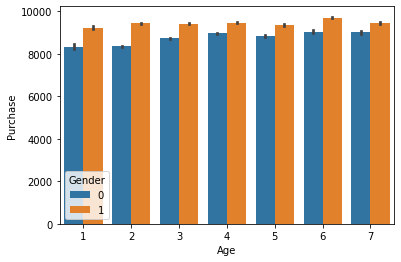

In [137]:
# Comparing Age vs Purchase
sns.barplot('Age','Purchase',hue= 'Gender',data= df)

#**Observation** -
Purchasing of men is high than female

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


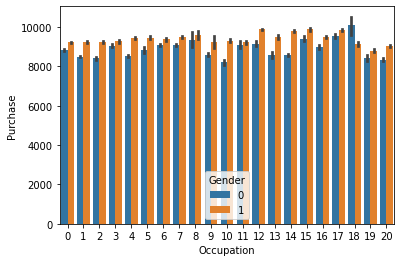

In [139]:
# Comparing Purchase vs Occupation
sns.barplot('Occupation','Purchase',hue= 'Gender',data= df)

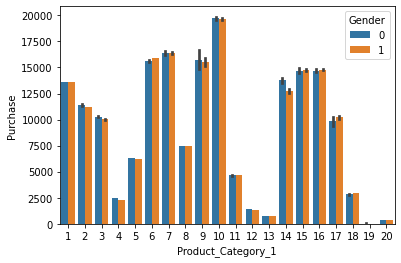

In [141]:
# Comparing Purchase vs Product category 
sns.barplot('Product_Category_1','Purchase',hue= 'Gender',data= df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


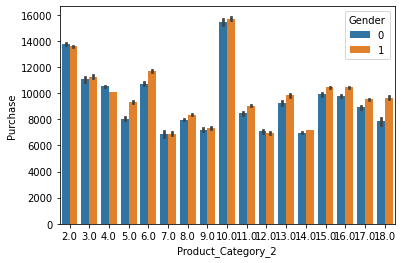

In [142]:
sns.barplot('Product_Category_2','Purchase',hue= 'Gender',data= df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


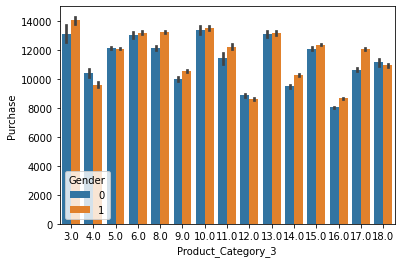

In [143]:
sns.barplot('Product_Category_3','Purchase',hue= 'Gender',data= df)

#**Observation**
The Product category 1 has given highest number of purchase nearly to 20k

In [160]:
df.drop('Product_ID',axis=1,inplace=True)

#**Feature Scaling**

**Step 1 - Train Test split**

In [161]:
X = df.drop('Purchase',axis=1) #Independent features
X.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,0,1,10,2,0,3,8.0,16.0,0,0
1,0,1,10,2,0,1,6.0,14.0,0,0
2,0,1,10,2,0,12,8.0,16.0,0,0
3,0,1,10,2,0,12,14.0,16.0,0,0
4,1,7,16,4,0,8,8.0,16.0,0,1


In [162]:
y = df['Purchase'] # Target feature

In [163]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=42)

Step 2 - Feature Scaling

In [164]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test = sc.transform(X_test)

